In [1]:
import numpy as np
import matplotlib.pyplot as plt

This notebook provides a basic example of using the `blg_strain` package to calculate the magnetoelectric susceptibility for strained bilayer graphene.

# Strained Lattice

In [2]:
from blg_strain.lattice import StrainedLattice

sl = StrainedLattice(eps=0.01, theta=0)
sl.calculate()

Below is a plot of the Brillouin zone (black hexagon) and location of the K/K' points (red markers), which do not coincide with the high-symmetry points of the Brillouin zone.

(-0.020000006962894046, 0.019999993037105954)

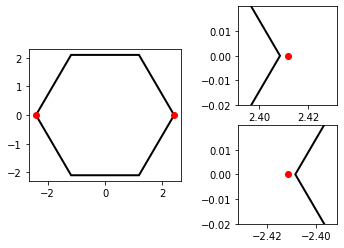

In [3]:
fig = plt.figure()
axes = [fig.add_subplot(x) for x in (121, 222, 224)]
for ax in axes:
    sl.plot_bz(ax)
    ax.set_aspect(1)

w = 0.02
axes[1].set_xlim(sl.K[0] - w, sl.K[0] + w)
axes[1].set_ylim(sl.K[1] - w, sl.K[1] + w)
axes[2].set_xlim(sl.Kp[0] - w, sl.Kp[0] + w)
axes[2].set_ylim(sl.Kp[1] - w, sl.Kp[1] + w)

# Band Structure

In [4]:
from blg_strain.bands import BandStructure

bs = BandStructure(sl=sl, window=0.1, Delta=0.01)
bs.calculate(Nkx=200, Nky=200)

Below are plots of the energy, one component of the wavefunction, Berry curvature, and orbital magnetic moment in regions of momentum space surrounding the K and K' valleys.

Text(0, 0.5, "$K'$")

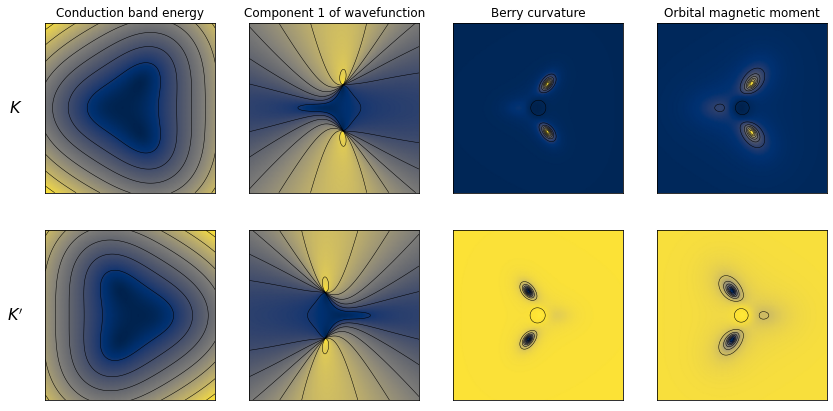

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
pcolormesh_kwargs = dict(cmap='cividis', shading='gouraud')
contour_kwargs = dict(colors='k', linewidths=0.5, linestyles='solid')

n = 2  # Band index
m = 1  # component of wavefunction
for i, (axK, axKp, A) in enumerate(zip(axes[0,:], 
                                       axes[1,:], 
                                       [bs.E[n], bs.Psi[n,m,:,:].real, bs.Omega[n], bs.Mu[n]])):
    # K
    axK.pcolormesh(bs.Kxa, bs.Kya, A, **pcolormesh_kwargs)
    axK.contour(bs.Kxa, bs.Kya, A, **contour_kwargs)

    # K'
    if i >= 2:  # Omega and Mu
        A = -A
    axKp.pcolormesh(-bs.Kxa, -bs.Kya, A, **pcolormesh_kwargs)
    axKp.contour(-bs.Kxa, -bs.Kya, A, **contour_kwargs)

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect(1)

axes[0,0].set_title('Conduction band energy')
axes[0,1].set_title(f'Component {m} of wavefunction')
axes[0,2].set_title('Berry curvature')
axes[0,3].set_title('Orbital magnetic moment')
axes[0,0].set_ylabel('$K$', rotation=0, labelpad=30, fontsize=16, va='center')
axes[1,0].set_ylabel('$K\'$', rotation=0, labelpad=30, fontsize=16, va='center')

# Filled bands

In [6]:
from blg_strain.bands import FilledBands

fb = FilledBands(bs=bs, EF=0.01)
fb.calculate(Nkx=500, Nky=500)

Below is a plot of the $x$ component of magnetoelectric susceptibility as a function of doping (carrier density) for the band structure illustrated above.

Text(0, 0.5, 'Magnetoelectric coefficient (a.u.)')

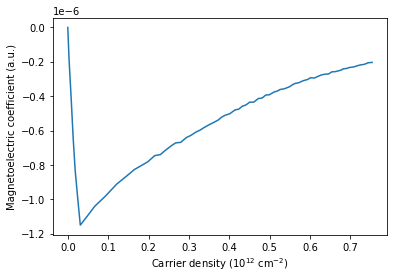

In [7]:
EFs = np.linspace(0, 0.015, 100)
ns = np.empty_like(EFs)
alphas = np.empty_like(EFs)
for i, EF in enumerate(EFs):
    fb = FilledBands(bs=bs, EF=EF)
    fb.calculate(500, 500)
    ns[i] = fb.n
    alphas[i] = fb.alpha[0]
    
fig, ax = plt.subplots()
ax.plot(ns/1e16, alphas)
ax.set_xlabel('Carrier density ($10^{12}$ cm$^{-2}$)')
ax.set_ylabel('Magnetoelectric coefficient (a.u.)')

# Saving and Loading

In [8]:
base_path = 'example'
sl.save(base_path)
bs.save()
fb.save()

In [9]:
sl_path = '/'.join((base_path, 'StrainedLattice_eps0.010_theta0.000_Run0'))
sl = StrainedLattice.load(sl_path + '.h5')

bs_path = '/'.join((sl_path, 'BandStructure_Nkx200_Nky200_Delta10.000'))
bs = BandStructure.load(bs_path + '.h5')

fb_path = '/'.join((bs_path, 'FilledBands_Nkx500_Nky500_EF15.000'))
fb = FilledBands.load(fb_path + '.h5')

## Create and load "summary" file

In [10]:
from blg_strain.utils.saver import load

Deltas, EFs, ns, Ds, alphas = load(sl_path)

In [11]:
Deltas, EFs, ns, Ds, alphas

(array([10.]),
 array([15.]),
 array([[7.53709272e+15]]),
 array([[1.64278875e+08]]),
 array([[[-2.03522753e-07,  0.00000000e+00]]]))